In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns 

In [2]:
df=pd.read_csv('/Users/etienneleconte/Downloads/acs2015_county_data.csv')

In [3]:
df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [4]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusId         3220 non-null   int64  
 1   State            3220 non-null   object 
 2   County           3220 non-null   object 
 3   TotalPop         3220 non-null   int64  
 4   Men              3220 non-null   int64  
 5   Women            3220 non-null   int64  
 6   Hispanic         3220 non-null   float64
 7   White            3220 non-null   float64
 8   Black            3220 non-null   float64
 9   Native           3220 non-null   float64
 10  Asian            3220 non-null   float64
 11  Pacific          3220 non-null   float64
 12  Citizen          3220 non-null   int64  
 13  Income           3219 non-null   float64
 14  IncomeErr        3219 non-null   float64
 15  IncomePerCap     3220 non-null   int64  
 16  IncomePerCapErr  3220 non-null   int64  
 17  Poverty       

1. We will predict Unemployment
2. CensusId, State, County will be dropped since they dont bring any useful information
3. Total Pop is kept, and we will normalize Gender

In [6]:
df.drop(['CensusId', 'State', 'County'], axis=1, inplace=True)

In [7]:
df.drop('Men',axis=1, inplace=True)

In [8]:
df.Women=df.Women/df.TotalPop

In [9]:
df.Citizen=df.Citizen/df.TotalPop

In [10]:
df.Employed=df.Employed/df.TotalPop

In [11]:
df.head()

,TotalPop,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,55221,0.515673,2.6,75.8,18.5,0.4,1.0,0.0,0.737491,51281.0,...,0.5,1.3,1.8,26.5,0.434364,73.6,20.9,5.5,0.0,7.6
1,195121,0.511513,4.5,83.1,9.5,0.6,0.7,0.0,0.756941,50254.0,...,1.0,1.4,3.9,26.4,0.440511,81.5,12.3,5.8,0.4,7.5
2,26932,0.461718,4.6,46.2,46.7,0.2,0.4,0.0,0.769122,32964.0,...,1.8,1.5,1.6,24.1,0.319211,71.8,20.8,7.3,0.1,17.6
3,22604,0.465891,2.2,74.5,21.4,0.4,0.1,0.0,0.773978,38678.0,...,0.6,1.5,0.7,28.8,0.366926,76.8,16.1,6.7,0.4,8.3
4,57710,0.505944,8.6,87.9,1.5,0.3,0.1,0.0,0.733755,45813.0,...,0.9,0.4,2.3,34.9,0.384491,82.0,13.5,4.2,0.4,7.7


In [12]:
df.isna().sum()

TotalPop           0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [13]:
df.shape

(3220, 33)

In [14]:
df.dropna(inplace=True)

In [15]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
TotalPop,3218.0,99471.07,319395.09,267.00,11225.25,26079.50,66457.50,10038388.00
Women,3218.0,0.50,0.02,0.27,0.50,0.50,0.51,0.59
Hispanic,3218.0,11.01,19.24,0.00,1.90,3.90,9.80,99.90
White,3218.0,75.45,22.92,0.00,64.10,84.10,93.20,99.80
Black,3218.0,8.67,14.28,0.00,0.50,1.90,9.60,85.90
Native,3218.0,1.72,7.25,0.00,0.10,0.30,0.60,92.10
Asian,3218.0,1.22,2.61,0.00,0.20,0.50,1.20,41.60
Pacific,3218.0,0.07,0.39,0.00,0.00,0.00,0.00,11.10
Citizen,3218.0,0.75,0.05,0.44,0.73,0.76,0.78,0.92
Income,3218.0,46123.62,12908.43,10499.00,38191.25,44748.50,52059.00,123453.00


In [16]:
df.corr().Unemployment.sort_values()

Employed          -0.698771
IncomePerCap      -0.547239
White             -0.540146
Income            -0.509054
WorkAtHome        -0.309747
Professional      -0.300318
SelfEmployed      -0.293592
IncomePerCapErr   -0.251561
IncomeErr         -0.226349
FamilyWork        -0.123187
PrivateWork       -0.104118
Construction      -0.091779
Walk              -0.080272
Asian             -0.055315
Pacific           -0.015888
Citizen            0.005613
TotalPop           0.030313
Transit            0.030784
Production         0.079907
Carpool            0.088236
Drive              0.096529
Women              0.105154
OtherTransp        0.117109
Office             0.161331
Native             0.187386
MeanCommute        0.292585
PublicWork         0.312533
Hispanic           0.321536
Black              0.352943
Service            0.365371
ChildPoverty       0.678441
Poverty            0.712419
Unemployment       1.000000
Name: Unemployment, dtype: float64

<AxesSubplot:>

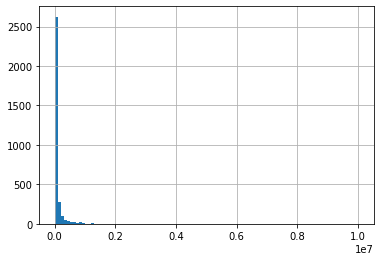

In [17]:
df.TotalPop.hist(bins=100)

In [18]:
df.TotalPop=df.TotalPop.apply(np.log)

<AxesSubplot:>

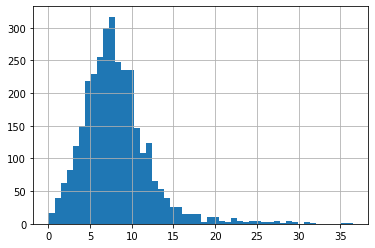

In [19]:
df.Unemployment.hist(bins=50)

<AxesSubplot:>

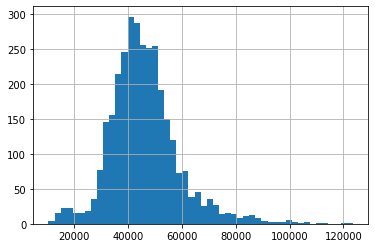

In [20]:
df.Income.hist(bins=50)

<AxesSubplot:>

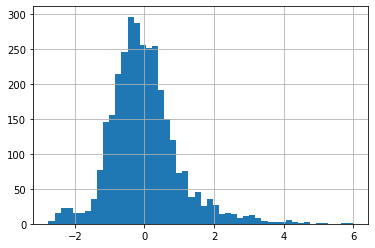

In [21]:
((df.Income-df.Income.mean())/df.Income.std()).hist(bins=50)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
scaler.fit(df[['Income']])

StandardScaler()

In [25]:
scaler.transform(df[['Income']])

array([[ 0.39959818],
       [ 0.3200254 ],
       [-1.01961757],
       ...,
       [-2.19314171],
       [-2.36290214],
       [-2.43410699]])

In [26]:
scaler=StandardScaler()

# Feature selection

## Filters

In [27]:
from sklearn.feature_selection import SelectKBest, f_regression

In [28]:
y=df.Unemployment
X=df.drop('Unemployment', axis=1)

In [29]:
selector=SelectKBest(f_regression, k=6) # I selected 6 columns out of 32 from X 

In [30]:
selection=selector.fit_transform(X,y)

In [31]:
pd.DataFrame(selection).head()

,0,1,2,3,4,5
0,75.8,51281.0,24974.0,12.9,18.6,0.434364
1,83.1,50254.0,27317.0,13.4,19.2,0.440511
2,46.2,32964.0,16824.0,26.7,45.3,0.319211
3,74.5,38678.0,18431.0,16.8,27.9,0.366926
4,87.9,45813.0,20532.0,16.7,27.2,0.384491


In [32]:
df.corr().Unemployment.map(abs).head()

TotalPop    0.157368
Women       0.105154
Hispanic    0.321536
White       0.540146
Black       0.352943
Name: Unemployment, dtype: float64

## Wrappers

In [33]:
pip install --upgrade mlxtend

Requirement already up-to-date: mlxtend in /usr/local/Cellar/jupyterlab/2.2.0/libexec/lib/python3.8/site-packages (0.17.3)
Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
estimator=LinearRegression()
selector_w1=RFE(estimator, n_features_to_select=6)
selector_w1.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [38]:
selector_w1.ranking_

array([ 2,  1, 22, 23, 19, 17, 21, 20,  5, 27, 26, 25, 24, 15, 18,  7,  3,
        6,  8,  4,  9, 10, 12, 14, 13, 11, 16,  1,  1,  1,  1,  1])

In [39]:
selector_w1.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True])

In [40]:
X.columns[selector_w1.support_]

Index(['Women', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork'],
      dtype='object')

In [41]:
selection_2=X.columns[selector_w1.support_]

In [42]:
OLS(y, add_constant(X[selection_2])).fit().summary()

NameError: name 'OLS' is not defined